In [97]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
# create dataframe
df=pd.read_csv('placement.csv')
df

,PRN ID,Full Name,Gender,10th - Aggregate Marks,12th - Aggregate Marks,Current Academics Aggregate Marks,Primary Other Degree - Degree,Job Organisations
0,1042180522,Abhilasha Kumari,Female,85.50,64.80,9.55,B.Sc.,Hexanika
1,1042180041,Albino Alex Braganza,Male,76.60,74.50,9.53,B.Sc.,Amdocs Development Centre
2,1042180830,Ali Asghar Hasan,Male,57.00,68.80,NaN,B.C.A.,Vendekin
3,1042180021,AMANDA Michael Srambical,Female,78.91,64.15,NaN,B.Sc.,Celebal Technologies
4,1042180711,Amit Gour,Male,69.16,74.40,NaN,B.Sc.,Bizmetric
...,...,...,...,...,...,...,...,...
94,1132190038,Vaishnavi Vineet Paulbudhe,Female,84.00,68.00,9.09,Bsc,NaN
95,1132190059,Vishwajit Deepak Nalawade,Male,66.40,52.77,NaN,B.Sc.,NaN
96,1132190116,Vishwas Vijay Kasote,Male,76.54,57.54,NaN,B.Sc.,ETHDC Technologies Pvt Ltd
97,1132190065,Yash Avinash Gandhi,Male,62.00,60.92,NaN,B.Sc.,Vendekin


In [101]:
#remove unwanted columns
df1 =df.drop(columns=['PRN ID','Full Name','Primary Other Degree - Degree'])
# replace missing values using mean
df1.fillna(df.mean(numeric_only=True))


,Gender,10th - Aggregate Marks,12th - Aggregate Marks,Current Academics Aggregate Marks,Job Organisations
0,Female,85.50,64.80,9.550000,Hexanika
1,Male,76.60,74.50,9.530000,Amdocs Development Centre
2,Male,57.00,68.80,8.843448,Vendekin
3,Female,78.91,64.15,8.843448,Celebal Technologies
4,Male,69.16,74.40,8.843448,Bizmetric
...,...,...,...,...,...
94,Female,84.00,68.00,9.090000,NaN
95,Male,66.40,52.77,8.843448,NaN
96,Male,76.54,57.54,8.843448,ETHDC Technologies Pvt Ltd
97,Male,62.00,60.92,8.843448,Vendekin


In [90]:
# Preprocess data as per requirement. add column for placement status yes or no, based 
#on the values of job orgnization  column
df1['placed']='no'
df1.loc[df['Job Organisations'].notnull(), 'placed'] = 'yes'
updated_csv_file_path = 'placementnew.csv'
df1.to_csv(updated_csv_file_path, index=False)
df1

,Gender,10th - Aggregate Marks,12th - Aggregate Marks,Current Academics Aggregate Marks,placed
0,Female,85.50,64.80,9.55,yes
1,Male,76.60,74.50,9.53,yes
2,Male,57.00,68.80,NaN,yes
3,Female,78.91,64.15,NaN,yes
4,Male,69.16,74.40,NaN,yes
...,...,...,...,...,...
94,Female,84.00,68.00,9.09,no
95,Male,66.40,52.77,NaN,no
96,Male,76.54,57.54,NaN,yes
97,Male,62.00,60.92,NaN,yes


In [91]:
# encode columns Gender and placed uisng one hot encoding
df2 = pd.get_dummies(df1, columns = ['placed','Gender'])
df2


,10th - Aggregate Marks,12th - Aggregate Marks,Current Academics Aggregate Marks,placed_no,placed_yes,Gender_Female,Gender_Male
0,85.50,64.80,9.55,0,1,1,0
1,76.60,74.50,9.53,0,1,0,1
2,57.00,68.80,NaN,0,1,0,1
3,78.91,64.15,NaN,0,1,1,0
4,69.16,74.40,NaN,0,1,0,1
...,...,...,...,...,...,...,...
94,84.00,68.00,9.09,1,0,1,0
95,66.40,52.77,NaN,1,0,0,1
96,76.54,57.54,NaN,0,1,0,1
97,62.00,60.92,NaN,0,1,0,1


In [95]:
# display correlation matrix
correlation_matrix =df2.corr()
correlation_matrix

,10th - Aggregate Marks,12th - Aggregate Marks,Current Academics Aggregate Marks,placed_no,placed_yes,Gender_Female,Gender_Male
10th - Aggregate Marks,1.000000,0.404338,0.446390,0.054934,-0.054934,0.287376,-0.287376
12th - Aggregate Marks,0.404338,1.000000,0.304618,-0.116846,0.116846,0.228153,-0.228153
Current Academics Aggregate Marks,0.446390,0.304618,1.000000,-0.324212,0.324212,0.009388,-0.009388
placed_no,0.054934,-0.116846,-0.324212,1.000000,-1.000000,-0.059191,0.059191
placed_yes,-0.054934,0.116846,0.324212,-1.000000,1.000000,0.059191,-0.059191
Gender_Female,0.287376,0.228153,0.009388,-0.059191,0.059191,1.000000,-1.000000
Gender_Male,-0.287376,-0.228153,-0.009388,0.059191,-0.059191,-1.000000,1.000000


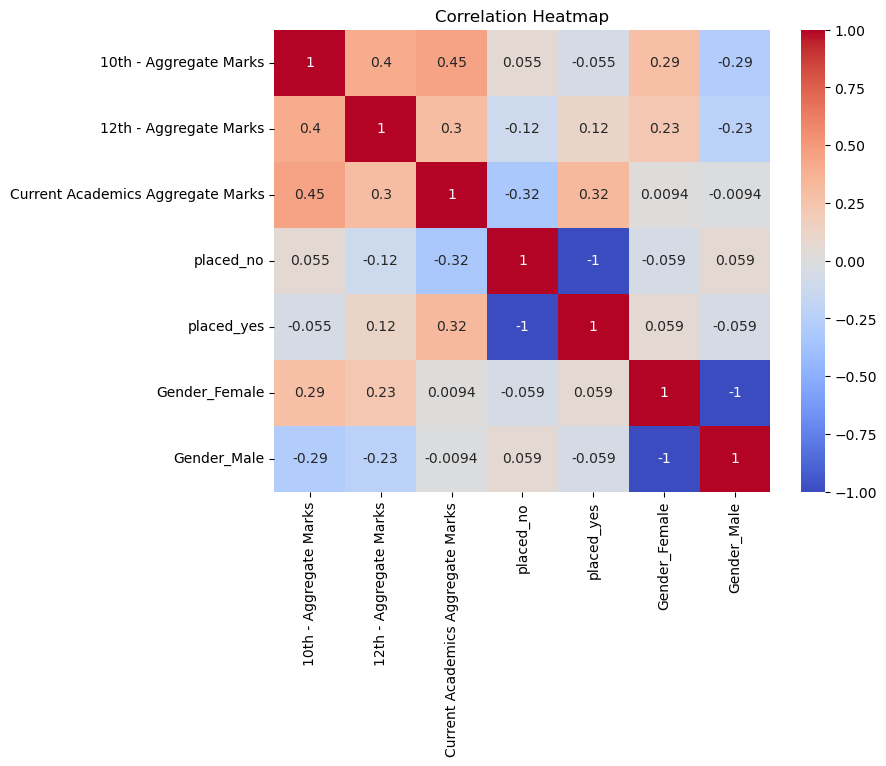

In [99]:
# disaply heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()